In [2]:
import os
import yaml

import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

### Test PSNR Metric

$$ MSE_c = {1 \over mn} \sum_{i=0}^{m-1} \sum_{j=0}^{n-1} {\left[ A_c(i,j) - B_c(i-j) \right]}^2 $$
$$ PSNR = 10 \log_{10} \left({255^2 \over MSE}\right) $$

### SSIM Metric
$$ {\rm SSIM}(x, y) = {(2\mu_x \mu_y + c_1)(2\sigma_{xy} + c_2) \over (\mu_x^2 + \mu_y^2 + c_1)(\sigma_x^2 + \sigma_y^2 + c_2)} $$

In [3]:
def psnr(X, Y):
    diff = (X - Y)
    MSE = (diff ** 2).mean()

    PSNR = 10 * np.log10(255**2 / MSE)
    return PSNR

def ssim(X, Y):
    mu_x = X.mean()
    mu_y = Y.mean()
    var_x = X.var()
    var_y = Y.var()
    sigma_xy = np.cov(X.flatten(), Y.flatten())[0, 1]

    L = 255
    c1 = (0.01 * L) ** 2
    c2 = (0.03 * L) ** 2

    s1 = (2 * mu_x * mu_y + c1) / (mu_x**2 + mu_y**2 + c1)
    s2 = (2 * sigma_xy + c2) / (var_x + var_y + c2)

    SSIM = s1 * s2
    return SSIM

In [4]:
def get_latest_target(dir_path):
    files = os.listdir(dir_path)
    files = sorted(files)
    latest = files[-1]
    return os.path.join(dir_path, latest)

# People Snapshot Data Validation

In [23]:
subjects = ["female-3-casual", "female-4-casual", "male-3-casual", "male-4-casual",]
width, height = 512, 512

data = []

for subject in subjects:
    conf_path = f'./confs/dataset/peoplesnapshot/{subject}.yaml'
    f = open(conf_path)
    conf = yaml.load(f, Loader=yaml.FullLoader)
    f.close()

    val_idx = conf['opt']['val']['start']
    # print(val_idx)

    img_gt = cv.imread(f'./data/PeopleSnapshot/{subject}/images/image_{val_idx:04d}.png')
    mask = np.load(f'./data/PeopleSnapshot/{subject}/masks/mask_{val_idx:04d}.npy')
    img_out = cv.imread(get_latest_target(f'./outputs/peoplesnapshot/demo/{subject}/animation/progression'))

    img_gt = cv.resize(img_gt, (width, height))
    mask = cv.resize(mask, (width, height)).astype(bool)
    img_out = cv.resize(img_out, (width, height))

    data.append([img_gt, mask, img_out])

### Visualization

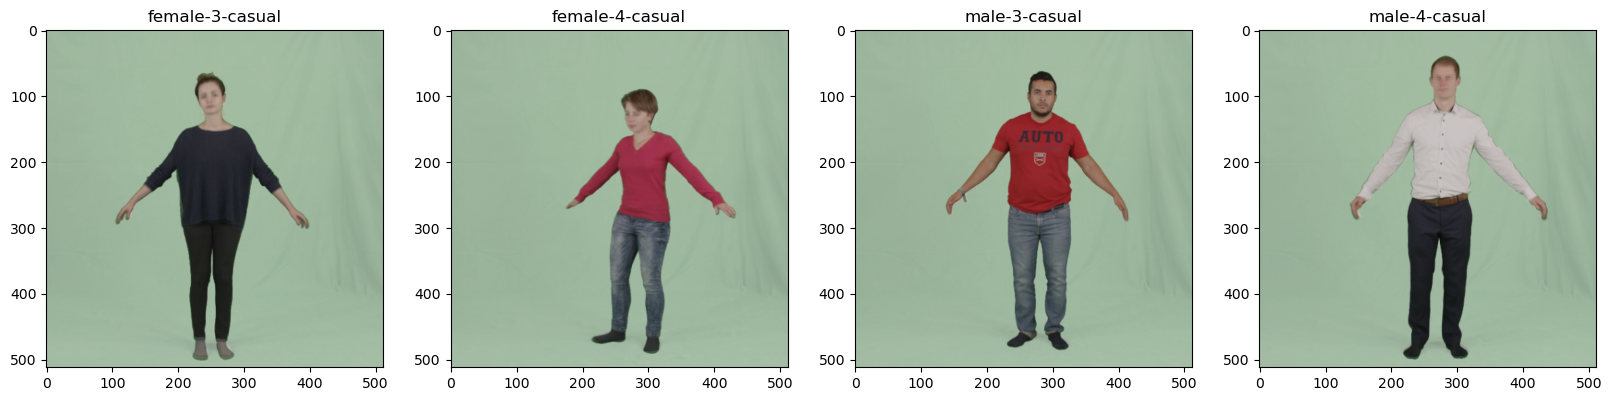

In [27]:
n = len(subjects)
fig, axs = plt.subplots(1, n, figsize=(5*n, 5))

for subject, ax, (img_gt, mask, img_out) in zip(subjects, axs, data):
    ax.set_title(subject)
    ax.imshow(img_gt[:,:,::-1])
    ax.imshow(img_out[:,:,::-1], alpha=0.5)

fig.show()

### PSNR & SSIM

In [34]:
for subject, (img_gt, mask, img_out) in zip(subjects, data):
    X = img_gt.copy(); X[~mask, :] = 255
    Y = img_out.copy()
    
    PSNR = psnr(X, Y)

    X_GRAY = cv.cvtColor(X, cv.COLOR_BGR2GRAY)
    Y_GRAY = cv.cvtColor(Y, cv.COLOR_BGR2GRAY)

    SSIM = ssim(X, Y)

    print(subject)
    print('PSNR: %.3f' % PSNR)
    print('\t> 26:', PSNR > 26)
    print('SSIM: %.3f' % SSIM)
    print('\t> 0.95:', SSIM > 0.95)
    print()

female-3-casual
PSNR: 40.958
	> 26: True
SSIM: 0.973
	> 0.95: True

female-4-casual
PSNR: 39.902
	> 26: True
SSIM: 0.977
	> 0.95: True

male-3-casual
PSNR: 40.300
	> 26: True
SSIM: 0.987
	> 0.95: True

male-4-casual
PSNR: 40.496
	> 26: True
SSIM: 0.977
	> 0.95: True



# Our Data Validation

In [37]:
subjects = ["doo",]
width, height = 512, 512

data = []

for subject in subjects:
    conf_path = f'./confs/dataset/ourdata/{subject}.yaml'
    f = open(conf_path)
    conf = yaml.load(f, Loader=yaml.FullLoader)
    f.close()

    val_idx = conf['opt']['val']['start']
    # print(val_idx)

    img_gt = cv.imread(f'./data/ourdata/{subject}/images/frame_{val_idx:04d}.png')
    mask = cv.imread(f'./data/ourdata/{subject}/masks/frame_{val_idx:04d}.png', cv.IMREAD_GRAYSCALE)
    img_out = cv.imread(get_latest_target(f'./outputs/ourdata/demo/{subject}/animation/progression'))

    img_gt = cv.resize(img_gt, (width, height))
    mask = cv.resize(mask, (width, height)).astype(bool)
    img_out = cv.resize(img_out, (width, height))

    data.append([img_gt, mask, img_out])

### Visualization

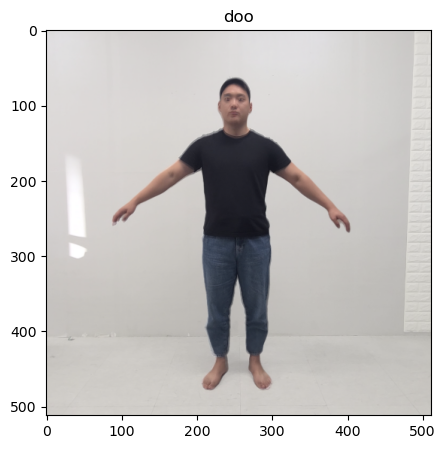

In [39]:
n = len(subjects)
fig, axs = plt.subplots(1, n, figsize=(5*n, 5))

for subject, ax, (img_gt, mask, img_out) in zip(subjects, [axs,], data):
    ax.set_title(subject)
    ax.imshow(img_gt[:,:,::-1])
    ax.imshow(img_out[:,:,::-1], alpha=0.5)

fig.show()

### PSNR & SSIM

In [40]:
for subject, (img_gt, mask, img_out) in zip(subjects, data):
    X = img_gt.copy(); X[~mask, :] = 255
    Y = img_out.copy()
    
    PSNR = psnr(X, Y)

    X_GRAY = cv.cvtColor(X, cv.COLOR_BGR2GRAY)
    Y_GRAY = cv.cvtColor(Y, cv.COLOR_BGR2GRAY)

    SSIM = ssim(X, Y)

    print(subject)
    print('PSNR: %.3f' % PSNR)
    print('\t> 26:', PSNR > 26)
    print('SSIM: %.3f' % SSIM)
    print('\t> 0.95:', SSIM > 0.95)
    print()

doo
PSNR: 39.801
	> 26: True
SSIM: 0.977
	> 0.95: True

